# Problem Set 5

In [1]:
# Standard Setup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
sns.set_theme()
# plt.xkcd()

In [2]:
# Initialise the dataframe
df_drinks = pd.read_csv("drinking.csv", header=1)
df_drinks

,Date,Number of cans,Amount in SGD
0,2022-02-11,2,21.40
1,2022-02-12,1,12.84
2,2022-02-13,2,21.40
3,2022-02-14,10,128.40
4,2022-02-15,2,21.40
5,2022-02-16,2,25.68
6,2022-02-17,2,21.40
7,2022-02-18,10,128.40
8,2022-02-19,2,21.40
9,2022-02-20,2,25.68


## Problem Set 5.1

In [3]:
x = np.arange(1,11)
y = x**2
coordinates = list(zip(x, y))
np.savetxt("quadratic.csv", coordinates)

## Problem Set 5.2

In [4]:
df_drinks.dtypes

Date               object
Number of cans      int64
Amount in SGD     float64
dtype: object

In [5]:
df_drinks["Date"] = df_drinks["Date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [6]:
df_drinks.dtypes

Date              datetime64[ns]
Number of cans             int64
Amount in SGD            float64
dtype: object

## Problem Set 5.3

In [7]:
df_drinks_2 = pd.read_csv("drinking2.csv", header=1)
df_drinks_2["Date"] = df_drinks_2["Date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [8]:
concat_df_drinks = pd.concat(objs=[df_drinks, df_drinks_2])
concat_df_drinks

,Date,Number of cans,Amount in SGD
0,2022-02-11,2,21.40
1,2022-02-12,1,12.84
2,2022-02-13,2,21.40
3,2022-02-14,10,128.40
4,2022-02-15,2,21.40
5,2022-02-16,2,25.68
6,2022-02-17,2,21.40
7,2022-02-18,10,128.40
8,2022-02-19,2,21.40
9,2022-02-20,2,25.68


Pandas concat merges two dataframes together via their indices, either by the row or column indices. Pandas does not edit the indices of the dataframes when concatenating.

## Problem Set 5.4

In [9]:
df_brands = pd.read_csv("brand.csv", header=1)
df_brands["Date"] = df_brands["Date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
df_brands

,Date,Brand
0,2022-02-11,Tiger
1,2022-02-12,Guinness
2,2022-02-13,Heineken
3,2022-02-14,Guinness
4,2022-02-15,Tiger
5,2022-02-16,Guinness
6,2022-02-20,Heineken
7,2022-02-17,Heineken
8,2022-02-18,Tiger
9,2022-02-19,Heineken


In [10]:
merge_df_drinks = concat_df_drinks.merge(df_brands, on="Date")
merge_df_drinks

,Date,Number of cans,Amount in SGD,Brand
0,2022-02-11,2,21.40,Tiger
1,2022-02-12,1,12.84,Guinness
2,2022-02-13,2,21.40,Heineken
3,2022-02-14,10,128.40,Guinness
4,2022-02-15,2,21.40,Tiger
5,2022-02-16,2,25.68,Guinness
6,2022-02-17,2,21.40,Heineken
7,2022-02-18,10,128.40,Tiger
8,2022-02-19,2,21.40,Heineken
9,2022-02-20,2,25.68,Heineken


Pandas concat merges the dataframes via the indices of a selected axis, while pandas merge merges the dataframes via a selected column's values, like a relational database.

## Problem Set 5.5

In [11]:
df_drinks = merge_df_drinks

In [12]:
df_drinks["Amount in SGD"] = df_drinks["Amount in SGD"].agg(lambda x:x * 1.07)

## Problem Set 5.6

In [13]:
df_drinks["Price per can in SGD"] = df_drinks["Amount in SGD"] / df_drinks["Number of cans"]

## Problem Set 5.7

In [14]:
df_drinks.drop("Amount in SGD", axis=1, inplace=True)

## Problem Set 5.8

In [15]:
for i, j in df_drinks.groupby(by = 'Brand'):
  print(f'{i}  \n {j}  \n')

Guinness  
          Date  Number of cans     Brand  Price per can in SGD
1  2022-02-12               1  Guinness               13.7388
3  2022-02-14              10  Guinness               13.7388
5  2022-02-16               2  Guinness               13.7388
10 2022-02-21               2  Guinness               11.4490  

Heineken  
          Date  Number of cans     Brand  Price per can in SGD
2  2022-02-13               2  Heineken               11.4490
6  2022-02-17               2  Heineken               11.4490
8  2022-02-19               2  Heineken               11.4490
9  2022-02-20               2  Heineken               13.7388
11 2022-02-22               2  Heineken               13.7388  

Tiger  
          Date  Number of cans  Brand  Price per can in SGD
0  2022-02-11               2  Tiger               11.4490
4  2022-02-15               2  Tiger               11.4490
7  2022-02-18              10  Tiger               13.7388
12 2022-02-23               2  Tiger       

Groupby essentially splits the remaining columns by the column fed to groupby. This allows functions to be performed on subsets of a dataset.

## Problem Set 5.9

In [16]:
df_drinks.groupby(by = 'Brand')["Number of cans"].sum()

Brand
Guinness    15
Heineken    10
Tiger       16
Name: Number of cans, dtype: int64

## Problem Set 5.10

Text(0.5, 1.0, 'Number of cans drank per day')

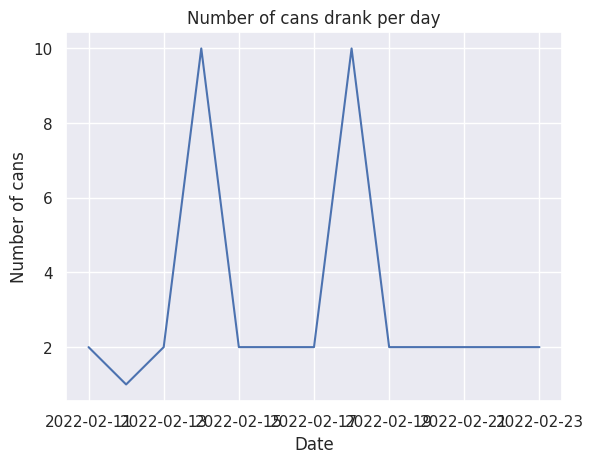

In [17]:
fig, ax = plt.subplots()
ax.plot(df_drinks["Date"], df_drinks["Number of cans"]) # TODO fix the axis here
ax.set_xlabel("Date")
ax.set_ylabel("Number of cans")
ax.set_title("Number of cans drank per day")

## Problem Set 5.11

In [18]:
t = np.arange(0, 10, 0.01)
s = 0.5 * 9.81 * (t ** 2)
ts_combined = np.concatenate((t.reshape(len(t), 1), np.around(s, 1).reshape(len(s), 1)), axis=1)

with open('exercise511.txt', 'w') as f:
  f.write(f'Lim Hua En, {datetime.datetime.today()}\n')

df_distance = pd.DataFrame(data=ts_combined, columns=["time", "distance"])
df_distance.to_csv(r'exercise511.txt', header=True, index=None, sep=' ', mode='a')

## Problem Set 5.12

In [19]:
ts_combined_2 = np.concatenate((np.around(t, 1).reshape(len(t), 1), s.reshape(len(s), 1)), axis=1)
with open('exercise512.csv', 'w') as f:
  f.write(f'Lim Hua En, {datetime.datetime.today()}\n')
  
df_distance_2 = pd.DataFrame(data=ts_combined_2, columns=["time", "distance"])
df_distance_2["distance"] = df_distance_2["distance"].map('{:,.2e}'.format)
# pd.set_option('display.float_format', '{:.2e}'.format)
# pd.set_option('display.float_format', '{:.2f}'.format)
# df_distance_2.to_csv(r'exercise512.csv', float_format="%.2e", header=True, index=None, mode='a')
df_distance_2.to_csv(r'exercise512.csv', header=True, index=None, mode='a')


## Problem Set 5.13

In [20]:
# Import the dataset
df_planets = pd.read_table('planet_data.txt', sep=" ", header=1)

# Find Earth's density and mass
earth_data = df_planets.loc[df_planets["planet"] == "Earth"]
earth_density = earth_data["mass"] / (1.333 * np.pi * (earth_data["diameter"] / 2) ** 3)
earth_density = earth_density.values[0]
earth_mass = earth_data["mass"].values[0]

# Calculate the average density of all planets relative to that of Earth
df_planets["average density"] = (df_planets["mass"] / (1.333 * np.pi * (df_planets["diameter"] / 2) ** 3)) / earth_density

# Filter the dataset to only include planets larger than Earth
filtered_df_planets = df_planets.loc[df_planets["mass"] > earth_mass]
filtered_df_planets = filtered_df_planets.sort_values(by="average density", ascending=False)
print(filtered_df_planets)

    planet  distance   mass  gravity  diameter   year  average density
7  Neptune     30.00   17.0     1.12      3.88  164.0         0.291041
6   Uranus     19.20   15.0     0.89      4.01   84.0         0.232626
4  Jupiter      5.20  318.0     2.36     11.20   11.9         0.226346
5   Saturn      9.58   95.0     0.92      9.45   29.0         0.112571


## Problem Set 5.14

In [21]:
df_env = pd.read_csv('NewYork_weather.csv')
df_env = df_env[["STATION", "NAME", "DATE", "TMAX", "TMIN"]]
df_env = df_env.replace('na', np.NaN)
# As there is only one station and name in the data, remove the station and name columns as well
df_env = df_env[["DATE", "TMAX", "TMIN"]]

/tmp/ipykernel_29724/3917401815.py:1: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_env = pd.read_csv('NewYork_weather.csv')


In [22]:
df_env["DATE"] = df_env["DATE"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
df_env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55882 entries, 0 to 55881
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    55882 non-null  datetime64[ns]
 1   TMAX    55875 non-null  object        
 2   TMIN    55875 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.3+ MB


In [23]:
# Rolling Method (too tedious)
# df_env_date = df_env.set_index('DATE', drop=False)
# df_env_date.rolling("YS")

In [24]:
# Groupby Method
df_env["YEAR"] = df_env["DATE"].map(lambda x: x.year)
df_env_cleaned = df_env.dropna(axis=0)
df_env_cleaned = df_env_cleaned.astype({'TMAX': 'int', 'TMIN': 'int'})
# df_env_cleaned.info()
df_env_result = df_env_cleaned[["YEAR", "TMAX", "TMIN"]].groupby(by=["YEAR"]).mean()

<AxesSubplot: xlabel='YEAR'>

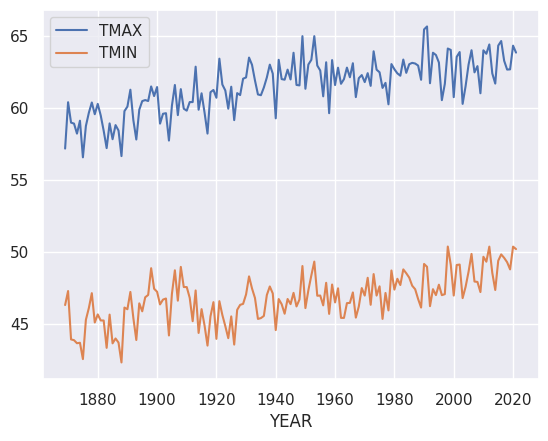

In [25]:
# Pandas Dataframe Plot
df_env_result.plot()

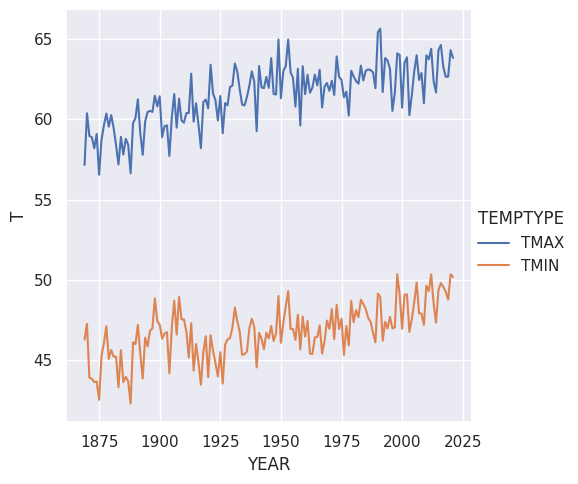

In [26]:
# Seaborn
df_env_sns = df_env_result.copy()
df_env_sns["YEAR"] = df_env_result.index
df_env_sns = df_env_sns[["YEAR", "TMAX", "TMIN"]].melt("YEAR", var_name="TEMPTYPE", value_name="T")
sns.relplot(kind="line", data=df_env_sns, x="YEAR", y="T", hue="TEMPTYPE")

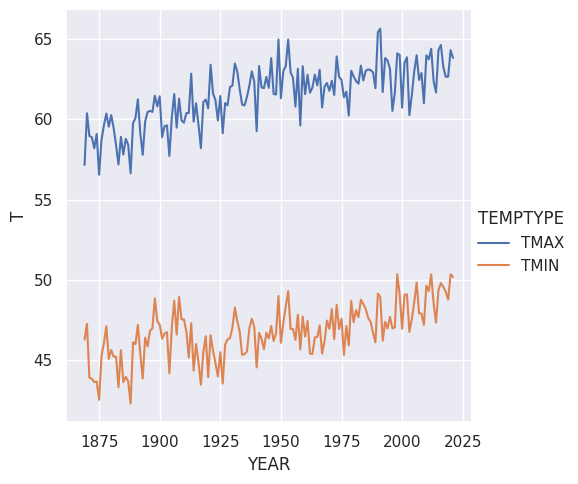

In [27]:
# Seaborn Again
df_env_sns_2 = df_env_cleaned[["YEAR", "TMAX", "TMIN"]].melt("YEAR", var_name="TEMPTYPE", value_name="T")
sns.relplot(kind="line", data=df_env_sns, x="YEAR", y="T", hue="TEMPTYPE")

## Problem Set 5.15

In [28]:
import os
homedir = os.path.expanduser('~')
genepath = os.path.join(homedir, "Documents", "human_genes.csv")
df_genes = pd.read_csv(genepath)

/tmp/ipykernel_29724/3169608929.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_genes = pd.read_csv(genepath)


In [29]:
df_genes.info()
# Gene ID + Chromosome Data
# Can drop everything else lol
# Basically just filter the chromosomes out from chromosome/scaffold name, then plot chromosome against gene stable ID count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362220 entries, 0 to 4362219
Data columns (total 10 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Gene stable ID                object
 1   Gene stable ID version        object
 2   Transcript stable ID          object
 3   Transcript stable ID version  object
 4   Transcript count              int64 
 5   Gene type                     object
 6   Protein stable ID             object
 7   Protein stable ID version     object
 8   Gene description              object
 9   Chromosome/scaffold name      object
dtypes: int64(1), object(9)
memory usage: 332.8+ MB


In [30]:
df_genes_filtered = df_genes[["Gene stable ID", "Chromosome/scaffold name"]]
df_genes_filtered["Chromosome/scaffold name"].unique()

array(['MT', 'KI270442.1', 'GL000009.2', 'CHR_HSCHR2_2_CTG1',
       'CHR_HSCHR5_2_CTG1', 'CHR_HSCHR20_1_CTG3', 'KI270711.1',
       'CHR_HSCHR19KIR_RSH_BA2_HAP_CTG3_1',
       'CHR_HSCHR19KIR_ABC08_AB_HAP_T_P_CTG3_1',
       'CHR_HSCHR19KIR_FH13_BA2_HAP_CTG3_1',
       'CHR_HSCHR19KIR_ABC08_AB_HAP_C_P_CTG3_1',
       'CHR_HSCHR19KIR_FH06_A_HAP_CTG3_1',
       'CHR_HSCHR19KIR_LUCE_A_HAP_CTG3_1',
       'CHR_HSCHR19KIR_FH13_A_HAP_CTG3_1', 'CHR_HSCHR1_4_CTG31',
       'CHR_HSCHR19KIR_T7526_A_HAP_CTG3_1',
       'CHR_HSCHR19KIR_RP5_B_HAP_CTG3_1',
       'CHR_HSCHR19KIR_FH05_B_HAP_CTG3_1',
       'CHR_HSCHR19KIR_T7526_BDEL_HAP_CTG3_1',
       'CHR_HSCHR19KIR_FH15_A_HAP_CTG3_1',
       'CHR_HSCHR19KIR_G085_BA1_HAP_CTG3_1', 'CHR_HSCHR1_1_CTG31',
       'CHR_HSCHR19KIR_FH06_BA1_HAP_CTG3_1',
       'CHR_HSCHR19KIR_FH08_A_HAP_CTG3_1',
       'CHR_HSCHR19KIR_G248_BA2_HAP_CTG3_1', 'CHR_HSCHR12_6_CTG2_1',
       'CHR_HSCHR19KIR_FH05_A_HAP_CTG3_1', 'GL000213.1',
       'CHR_HSCHR3_5_CTG2_1', 'KI270

In [31]:
# Filter out all non-numeric values
df_genes_chromosome = df_genes_filtered[pd.to_numeric(df_genes_filtered["Chromosome/scaffold name"], errors="coerce").notnull()]
df_genes_chromosome = df_genes_chromosome.rename(columns={"Chromosome/scaffold name": "Chromosome No"})
df_genes_chromosome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837350 entries, 328396 to 4362219
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Gene stable ID  object
 1   Chromosome No   object
dtypes: object(2)
memory usage: 87.8+ MB


In [32]:
df_genes_chr_cleaned = df_genes_chromosome.copy()
df_genes_chr_cleaned["Chromosome No"] = pd.to_numeric(df_genes_chromosome["Chromosome No"])

<AxesSubplot: xlabel='Chromosome No'>

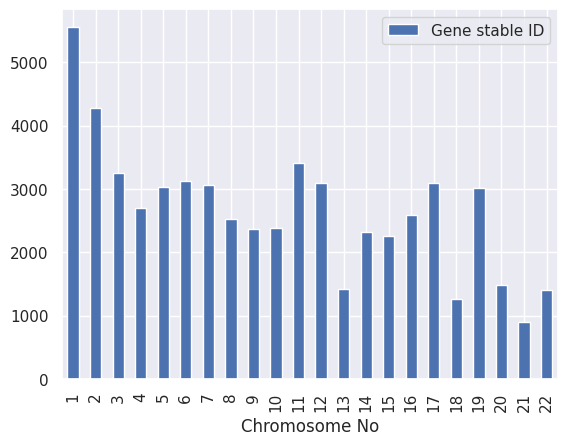

In [35]:
df_genes_chr_grouped = df_genes_chr_cleaned.groupby(by="Chromosome No").nunique()
df_genes_chr_grouped.plot(kind="bar")

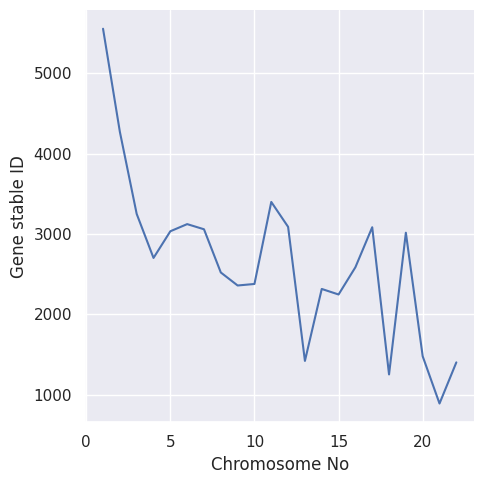

In [47]:
sns.relplot(kind="line", data=df_genes_chr_grouped, x="Chromosome No", y="Gene stable ID")

In [53]:
# Seaborn (too slow)
# sns.displot(kind="hist", data=df_genes_chr_cleaned, x="Chromosome No", y="Gene stable ID")

Error in callback <function _draw_all_if_interactive at 0x7fc29427c4a0> (for post_execute):


KeyboardInterrupt: 